In [ ]:
import networkx as nx
import community as community_louvain
import matplotlib.pyplot as plt
import pandas as pd
import gzip
import tarfile
from networkx.algorithms import community, centrality, assortativity

def load_graph():
    file_path = "facebook.tar.gz"
    G = nx.Graph()
    
    with tarfile.open(file_path, "r:gz") as tar:
        for member in tar.getmembers():
            if member.name.endswith(".edges"): 
                f = tar.extractfile(member)
                for line in f:
                    node1, node2 = map(int, line.decode().strip().split())
                    G.add_edge(node1, node2)
    return G

G = load_graph()
print(G)

Graph with 3959 nodes and 84243 edges


In [10]:
def detect_louvain_communities(G):
    partition = community_louvain.best_partition(G)
    return partition

partition = detect_louvain_communities(G)
print(partition)
pd.Series(list(partition.values())).value_counts()

{236: 0, 186: 0, 122: 0, 285: 0, 24: 0, 346: 0, 271: 0, 304: 0, 176: 0, 9: 0, 130: 0, 329: 0, 204: 0, 213: 0, 252: 0, 332: 0, 82: 0, 65: 0, 276: 0, 26: 0, 280: 0, 272: 0, 211: 0, 199: 0, 84: 0, 133: 0, 62: 0, 239: 0, 172: 0, 322: 0, 53: 0, 3: 0, 170: 0, 175: 1, 46: 1, 56: 0, 254: 0, 194: 0, 231: 0, 117: 0, 127: 0, 135: 0, 103: 0, 188: 0, 23: 0, 116: 1, 73: 0, 299: 0, 288: 0, 315: 0, 119: 0, 323: 0, 48: 0, 57: 0, 200: 0, 98: 0, 313: 0, 63: 0, 344: 0, 67: 0, 118: 0, 325: 0, 277: 0, 134: 0, 270: 0, 76: 0, 36: 0, 223: 0, 274: 0, 88: 0, 21: 0, 339: 0, 108: 0, 197: 0, 169: 0, 275: 2, 273: 2, 83: 0, 28: 1, 312: 1, 242: 0, 214: 1, 20: 1, 307: 1, 71: 1, 333: 1, 207: 0, 168: 0, 308: 0, 341: 0, 128: 0, 334: 0, 238: 0, 265: 0, 141: 0, 78: 2, 345: 0, 317: 0, 158: 0, 38: 0, 302: 0, 27: 0, 54: 0, 139: 0, 109: 0, 291: 0, 142: 0, 203: 0, 105: 0, 232: 0, 64: 0, 217: 0, 248: 0, 126: 0, 224: 0, 261: 0, 283: 0, 144: 1, 226: 1, 290: 0, 25: 0, 342: 0, 146: 0, 300: 0, 94: 0, 1: 0, 184: 0, 159: 0, 149: 1, 13: 

6     507
22    394
8     364
15    309
4     277
25    264
33    237
0     229
38    226
21    220
20    190
36    135
23    123
1      76
34     73
14     67
26     48
17     45
3      39
16     25
9      23
35     19
2      10
13     10
19      8
24      6
5       6
31      4
27      3
10      3
37      3
11      2
32      2
30      2
29      2
12      2
7       2
18      2
28      2
Name: count, dtype: int64

In [11]:
def detect_girvan_newman(G):
    comp = community.girvan_newman(G)
    return tuple(sorted(c) for c in next(comp))

comm = detect_girvan_newman(G)
print(comm)

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 13, 14, 16, 17, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 34, 35, 36, 38, 39, 40, 41, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 211, 212, 213, 214, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 234, 235, 236

In [12]:
def compute_centralities(G):
    degree_centrality = nx.degree_centrality(G)
    betweenness_centrality = nx.betweenness_centrality(G)
    closeness_centrality = nx.closeness_centrality(G)
    eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
    pagerank = nx.pagerank(G)
    harmonic_centrality = nx.harmonic_centrality(G)
    
    return {
        'degree': degree_centrality,
        'betweenness': betweenness_centrality,
        'closeness': closeness_centrality,
        'eigenvector': eigenvector_centrality,
        'pagerank': pagerank,
        'harmonic': harmonic_centrality
    }

centralities = compute_centralities(G)
print(centralities)

{'degree': {236: 0.009095502779181405, 186: 0.010864072764022235, 122: 0.015664477008590198, 285: 0.011622031328954018, 24: 0.003789792824658919, 346: 0.006568974229408793, 271: 0.01819100555836281, 304: 0.013643254168772108, 176: 0.0032844871147043966, 9: 0.014148559878726631, 130: 0.003789792824658919, 329: 0.007326932794340576, 204: 0.005305709954522487, 213: 0.009600808489135929, 252: 0.01616978271854472, 332: 0.010611419909044973, 82: 0.008337544214249622, 65: 0.0027791814047498737, 276: 0.004295098534613442, 26: 0.016927741283476506, 280: 0.010611419909044973, 272: 0.011116725618999495, 211: 0.007326932794340576, 199: 0.011622031328954018, 84: 0.0030318342597271354, 133: 0.004295098534613442, 62: 0.0063163213744315315, 239: 0.014653865588681153, 172: 0.01010611419909045, 322: 0.01793835270338555, 53: 0.007579585649317838, 3: 0.00404244567963618, 170: 0.011369378473976757, 175: 0.00404244567963618, 46: 0.001010611419909045, 56: 0.01945426983324912, 254: 0.00404244567963618, 194: 0

In [13]:
def compute_assortativity(G):
    degree_assortativity = assortativity.degree_assortativity_coefficient(G)
    clustering_coefficient = nx.average_clustering(G)
    transitivity = nx.transitivity(G)
    
    return {
        'degree_assortativity': degree_assortativity,
        'clustering_coefficient': clustering_coefficient,
        'transitivity': transitivity
    }

assortativity_measures = compute_assortativity(G)
print("Assortativity Measures Computed:", assortativity_measures)

Assortativity Measures Computed: {'degree_assortativity': 0.6299345168308585, 'clustering_coefficient': 0.5437268365614675, 'transitivity': 0.592260317265154}


In [14]:
# Save Centralities to CSV
def save_centralities(centralities):
    df = pd.DataFrame(centralities)
    df.to_csv("centralities.csv", index_label="Node")
    print("Centralities saved to centralities.csv")
save_centralities(centralities)
    

Centralities saved to centralities.csv


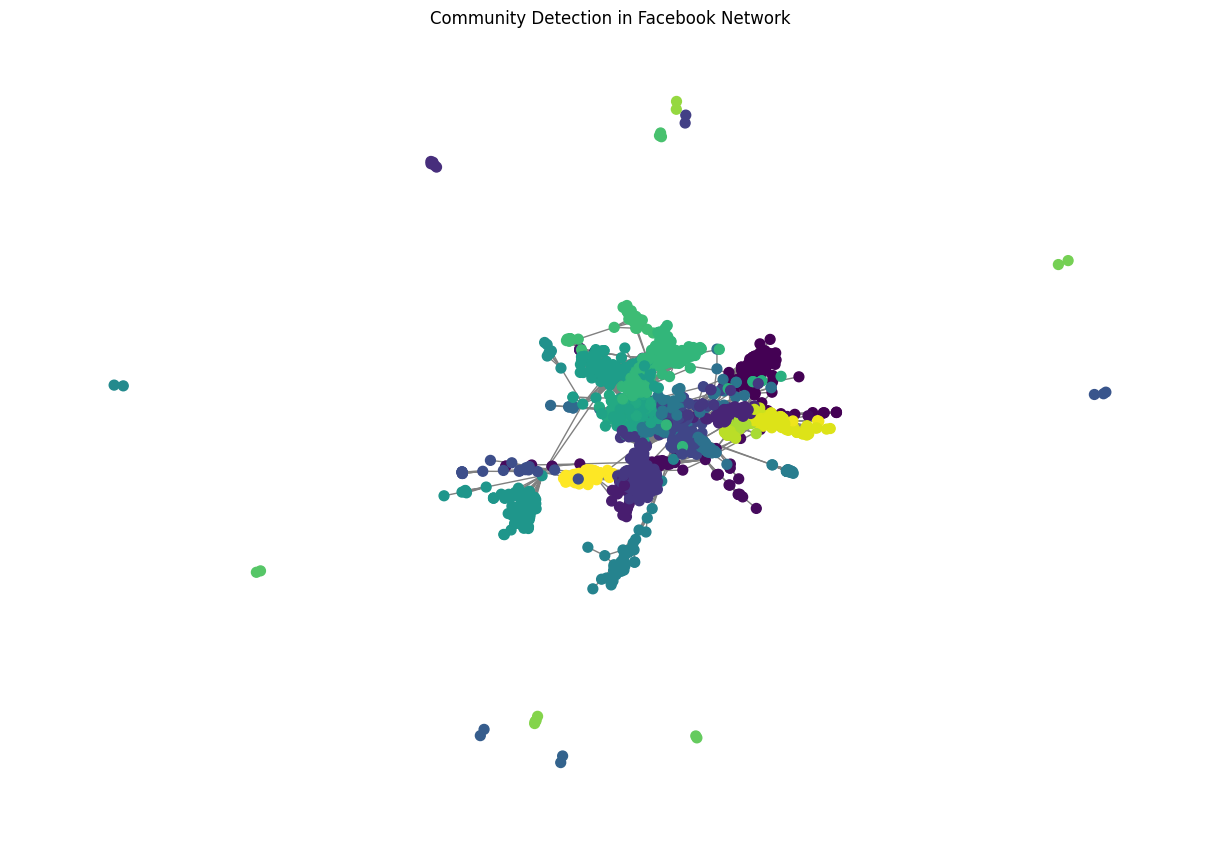

In [15]:
def plot_graph(G, partition):
    pos = nx.spring_layout(G)
    cmap = plt.get_cmap("viridis")
    
    plt.figure(figsize=(12, 8))
    nx.draw(G, pos, node_color=[partition.get(node, 0) for node in G.nodes()], cmap=cmap, node_size=50, edge_color='gray')
    plt.title("Community Detection in Facebook Network")
    plt.show()

plot_graph(G, partition)